10-Jun-2020 Warmup

In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
%pwd

'C:\\Users\\cxu19\\onedrive\\documents\\flatiron\\hbs\\hbs-ds-060120\\Warm-Ups'

In [3]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 2C31-4436

 Directory of C:\Users\cxu19\onedrive\documents\flatiron\hbs\hbs-ds-060120\Warm-Ups

07/01/2020  06:59 PM    <DIR>          .
07/01/2020  06:59 PM    <DIR>          ..
06/11/2020  10:08 AM    <DIR>          .ipynb_checkpoints
06/24/2020  09:43 AM            36,883 auto.pkl
07/01/2020  06:03 PM    <DIR>          data
06/10/2020  05:20 PM               614 exam_data.pkl
07/01/2020  06:59 PM           711,803 Warm_Ups.ipynb
               3 File(s)        749,300 bytes
               4 Dir(s)  60,380,213,248 bytes free


In [4]:
pkl_dict = pd.read_pickle('exam_data.pkl')

In [5]:
df = pd.DataFrame(pkl_dict)

In [6]:
df.head()

,name,score,attempts,qualify
0,Anastasia,12.5,1,yes
1,Dima,9.0,3,no
2,Katherine,16.5,2,yes
3,James,NaN,3,no
4,Emily,9.0,2,no


In [7]:
df.sort_values(by=['attempts','score'], ascending=[True, False])

,name,score,attempts,qualify
11,Jesus,19.5,1,yes
9,Jonas,19.0,1,yes
19,Kimberly,19.0,1,yes
16,Dani,18.0,1,yes
13,Devontae,15.0,1,yes
6,Matthew,14.5,1,yes
0,Anastasia,12.5,1,yes
7,Laura,NaN,1,no
12,John,NaN,1,no
17,Catherine,NaN,1,no


23-Jun Warmup

In [8]:
from scipy.stats import ttest_1samp
from scipy import stats
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind


In [9]:
b1 = [38, 50, 44, 36, 49, 63, 54, 36, 64, 59]
b2 = [66, 68, 44, 55, 82, 75, 70, 48, 58, 69, 86, 86]

H(0): There is no difference in chips provided between one and the other <br>
H(1): There is a difference in chips provided between one and the other

In [10]:
alpha = 0.05

In [11]:
ttest_ind(b1, b2, equal_var=True)

Ttest_indResult(statistic=-3.32970017029296, pvalue=0.0033405529226708435)

In [12]:
analysis = TTestIndPower()

# parameters for power analysis
effect = 0.08
alpha = 0.5
nobs = 10000

# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=.7,
                              power=.8,
                              nobs1=None,
                              ratio=1.0,
                              alpha=0.05)

In [13]:
print (result)

33.024569515862694


24-Jun-2020

In [37]:
import numpy as np
import pandas as pd
import pickle

In [38]:
% pwd

UsageError: Line magic function `%` not found.


In [39]:
%pwd

'C:\\Users\\cxu19\\onedrive\\documents\\flatiron\\hbs\\hbs-ds-060120\\Warm-Ups'

In [40]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 2C31-4436

 Directory of C:\Users\cxu19\onedrive\documents\flatiron\hbs\hbs-ds-060120\Warm-Ups

07/01/2020  06:59 PM    <DIR>          .
07/01/2020  06:59 PM    <DIR>          ..
06/11/2020  10:08 AM    <DIR>          .ipynb_checkpoints
06/24/2020  09:43 AM            36,883 auto.pkl
07/01/2020  06:03 PM    <DIR>          data
06/10/2020  05:20 PM               614 exam_data.pkl
07/01/2020  06:59 PM           711,803 Warm_Ups.ipynb
               3 File(s)        749,300 bytes
               4 Dir(s)  60,380,184,576 bytes free


In [41]:
pkl_dict = pd.read_pickle('auto.pkl')

In [42]:
df = pd.DataFrame(pkl_dict)

In [43]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,before_1977
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,1


29-Jun-2020 Warm-Up

## Module 2 & 3 Summaries

### Imports

In [44]:
import numpy as np
import pandas as pd
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Linear Regression Using Auto Data

In [45]:
# Get data
df = pd.read_pickle('auto.pkl')

In [46]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
before_1977     0
dtype: int64

In [47]:
X = df[['displacement','weight','acceleration']]
y = df['mpg']

__Linear Regression - Assumption Checking__

- The true relationship is linear
- No multicollinearity between independent variables
- Errors are normally distributed with mean 0
- Homoscedasticity of errors (or, constant variance around the line).
- Independence of the observations

In [48]:
# Check for linearity using scatterplot
# Plot dependent variable against every independent variable
# Relationship might be log vs. linear between mpg and displacement, weight --> no relationship with acceleration

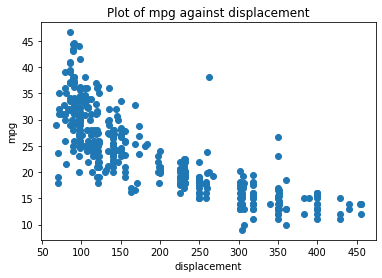

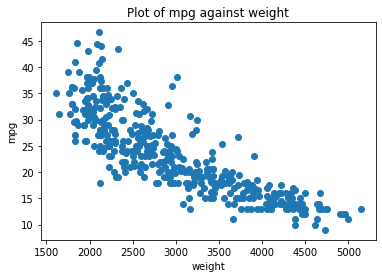

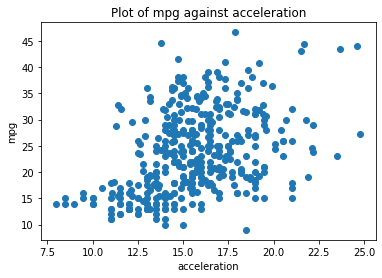

In [49]:
features = ['displacement', 'weight', 'acceleration']

for x in features:
    plt.scatter(df[x], df['mpg'])
    plt.title('Plot of mpg against ' + x)
    plt.xlabel(x)
    plt.ylabel('mpg')
    plt.show()

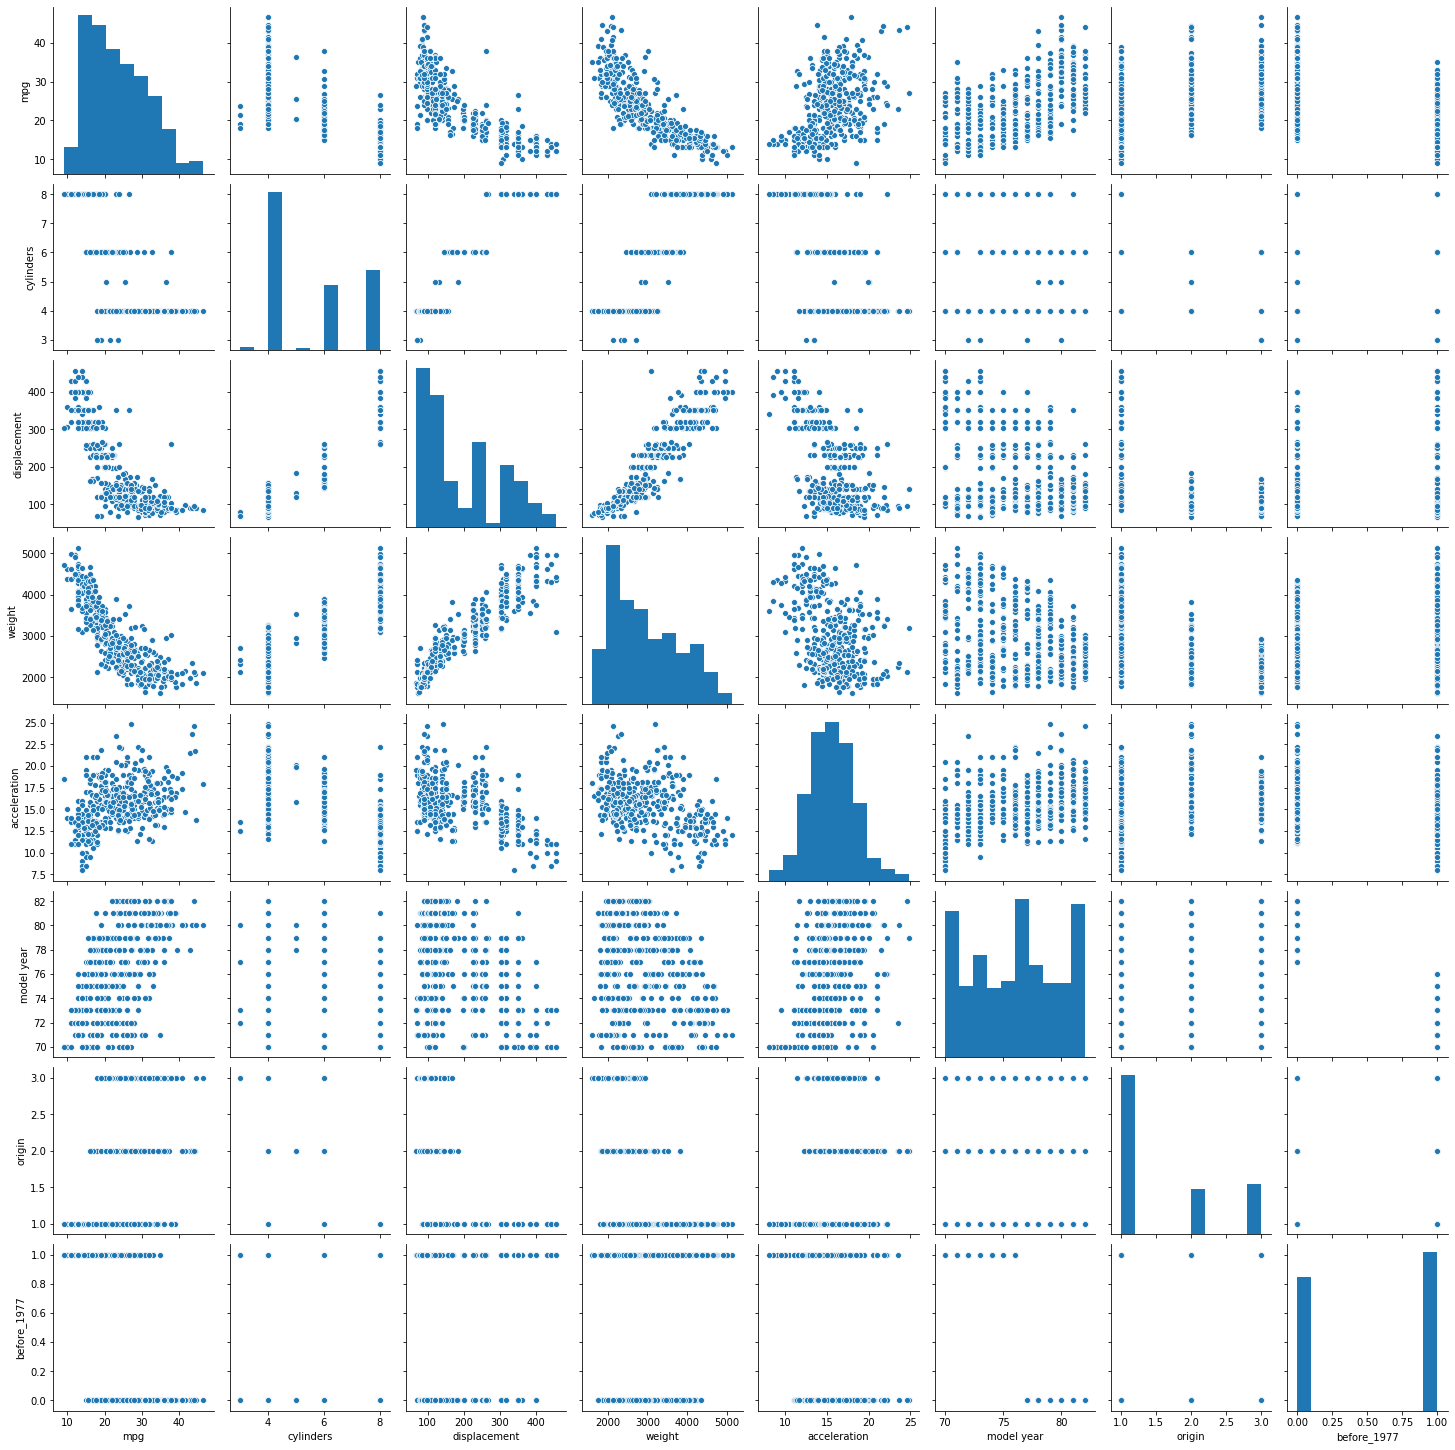

In [50]:
# use pairplot

sns.pairplot(df)
plt.show()

In [51]:
# Calculate correlation / Pearson's R value
df.corr().mpg.sort_values(ascending=False)

mpg             1.000000
model year      0.579267
origin          0.563450
acceleration    0.420289
before_1977    -0.522468
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

In [52]:
X.head()

,displacement,weight,acceleration
0,307.0,3504,12.0
1,350.0,3693,11.5
2,318.0,3436,11.0
3,304.0,3433,12.0
4,302.0,3449,10.5


In [53]:
# check for multicolinearity by calculating VIF; VIF > 5 is multicolinearity indication, VIF > 10 is CERTAINTY
# only columns with floats / integers
vif = pd.DataFrame()
vif['VIF Score'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
vif['features'] = X.columns
vif

,VIF Score,features
0,44.004802,displacement
1,101.585719,weight
2,19.778338,acceleration


In [54]:
# use statsmodels to test for residuals
X1 = df['displacement']
y1 = df['mpg']
X1_const = sm.add_constant(X1)
est = sm.OLS(y1, X1_const, hconst=True)
fitted_est = est.fit()
fitted_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     725.0
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           1.66e-91
Time:                        16:36:44   Log-Likelihood:                -1175.5
No. Observations:                 398   AIC:                             2355.
Df Residuals:                     396   BIC:                             2363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.1748      0.492     71.519      0.000      34.208      36.142
displacement    -0.0603      0.002    -26.926      0.000      -0.065      -0.056
==============================================================================
Omnibus:                       41.373   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.024
Skew:                           0.711   Prob(JB):                     9.24e-14
Kurtosis:                       4.264   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

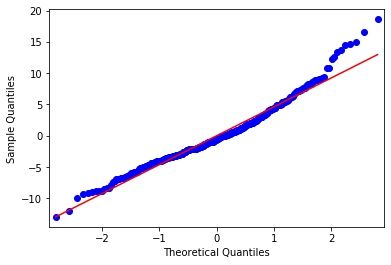

In [55]:
# QQ plots do not indicate statistical significance, but are generally great tools for checking for normality.
res = fitted_est.resid
fig = sm.qqplot(res, line = 'r')

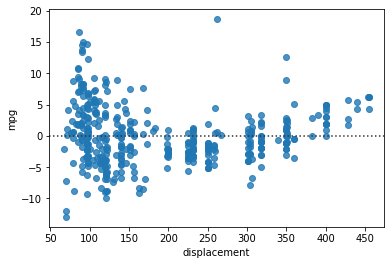

In [56]:
x = df['displacement']
y = df['mpg']
sns.residplot(x,y)

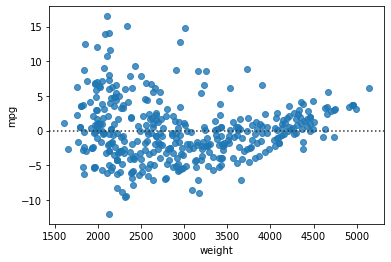

In [57]:
x = df['weight']
y = df['mpg']
sns.residplot(x,y)

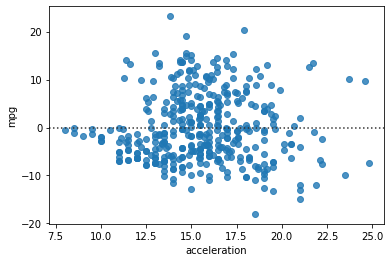

In [58]:
x = df['acceleration']
y = df['mpg']
sns.residplot(x,y)

__Prepare Data__

In [59]:
# Encode categorical variable

In [60]:
# Split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
#consider changing random_state as it could impact results 

In [61]:
# Scale data (using either standard or minmax - similar)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

__Using sklearn__

Linear Regression

In [111]:
df = pd.read_pickle('auto.pkl')
X = df[['displacement','weight','acceleration']]
y = df['mpg']

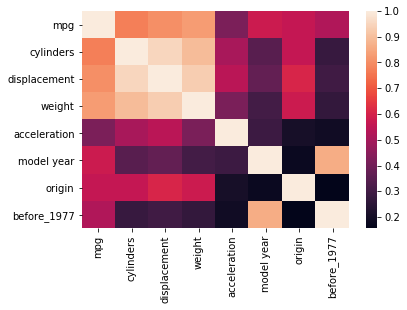

In [112]:
sns.heatmap(df.corr().abs())
plt.show()

In [113]:
# Split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
#consider changing random_state as it could impact results 

In [114]:
# Scale data (using either standard or minmax - similar)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
lr = LinearRegression()
model = lr.fit(X_train_scaled, y_train)
model.coef_

array([-1.384954  , -5.09704451,  0.43726325])

In [ ]:
r2_score(y_)

In [116]:
lr2 = LinearRegression()

In [117]:
# use K fold cross validation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scores = cross_val_score(lr2, X_scaled, y, cv=5, scoring="r2")

In [118]:
scores

array([ 0.44953656,  0.34853242,  0.77095242,  0.67056244, -0.67562416])

In [70]:
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")

Training Scores:
R2: 0.6943122190044733
Mean Absolute Error: 3.343077648696792
---
Testing Scores:
R2: 0.7250072818587612
Mean Absolute Error: 3.112577882347304


In [71]:
# use Lasso (feature selection) or Ridge (colinearity)

In [72]:
lasso = Lasso(alpha=.5)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
lasso.coef_

array([-1.59590847, -4.55383341,  0.03605685])

In [74]:
# Evaluate=
y_train_pred_l1 = lasso.predict(X_train_scaled)
y_test_pred_l1 = lasso.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred_l1)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred_l1)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred_l1)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred_l1)}")

Training Scores:
R2: 0.6884618401373555
Mean Absolute Error: 3.327204486612843
---
Testing Scores:
R2: 0.7292801870069394
Mean Absolute Error: 3.0480949076134634


In [75]:
ridge = Ridge(alpha=.5)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
y_train_pred_l2 = ridge.predict(X_train_scaled)
y_test_pred_l2 = ridge.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred_l2)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred_l2)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred_l2)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred_l2)}")

Training Scores:
R2: 0.6943078093858466
Mean Absolute Error: 3.3423785360330363
---
Testing Scores:
R2: 0.7249745628813438
Mean Absolute Error: 3.1128145370407436


In [99]:
lr = LinearRegression()
model = lr.fit(X_train_scaled, y_train)

In [100]:
r2_score(y_test, lr.predict(X_test_scaled))

0.7250072818587612

array([0.95726861, 0.94765393, 0.96630035, 0.93609708, 0.94721476])

In [79]:
# Print it nicely
print(f"Scores: {scores.mean():.3f} +/- {scores.std():.3f}")

Scores: 0.313 +/- 0.517


__Using statsmodels__

In [80]:
# Add constats for y intercept
X_train_scaled_sm = sm.add_constant(X_train_scaled)
X_test_scaled_sm = sm.add_constant(X_test_scaled)

In [81]:
model = sm.OLS(y_train, X_train_scaled_sm, hasconst=True)
model_fitted = model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     237.7
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           1.83e-80
Time:                        16:36:46   Log-Likelihood:                -920.77
No. Observations:                 318   AIC:                             1850.
Df Residuals:                     314   BIC:                             1865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.6082      0.247     95.558      0.000      23.122      24.094
x1            -1.3850      0.756     -1.831      0.068      -2.873       0.103
x2            -5.0970      0.702     -7.256      0.000      -6.479      -3.715
x3             0.4373      0.302      1.449      0.148      -0.157       1.031
==============================================================================
Omnibus:                       28.357   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.739
Skew:                           0.659   Prob(JB):                     1.05e-08
Kurtosis:                       4.018   Cond. No.                         6.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([ 4., 10., 41., 93., 83., 49., 21.,  9.,  5.,  3.]),
 array([-12.04278562,  -9.23947259,  -6.43615956,  -3.63284652,
         -0.82953349,   1.97377954,   4.77709258,   7.58040561,
         10.38371864,  13.18703167,  15.99034471]),
 <a list of 10 Patch objects>)

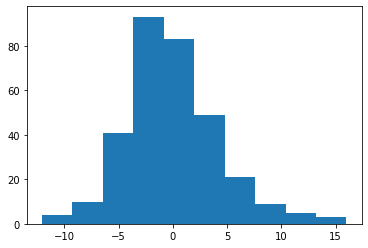

In [82]:
plt.hist(model_fitted.resid)

## New Dataset

In [83]:
# load Credit data (from https://www.kaggle.com/avikpaul4u/credit-card-balance)
df = pd.read_csv('data/Credit.csv', index_col=0)
df = df.drop(columns='Ethnicity')
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,903
3,104.593,7075,514,4,71,11,Male,No,No,580
4,148.924,9504,681,3,36,11,Female,No,No,964
5,55.882,4897,357,2,68,16,Male,No,Yes,331


In [84]:
df.shape

(400, 10)

In [85]:
outcome = 'Balance'
x_cols = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
          'Student', 'Married']
x_continuous = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education'] 

In [86]:
# one hot encode variables
categorical_variables = ['Gender', 'Student', 'Married']
df_ohe = pd.get_dummies(df[x_cols],
                        columns=categorical_variables,
                        drop_first=True)
df_ohe.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes
1,14.891,3606,283,2,34,11,0,0,1
2,106.025,6645,483,3,82,15,1,1,1
3,104.593,7075,514,4,71,11,0,0,0
4,148.924,9504,681,3,36,11,1,0,0
5,55.882,4897,357,2,68,16,0,0,1


In [87]:
X = df_ohe
X_const = sm.add_constant(X)
y = df['Balance']
model = sm.OLS(y, X_const, hconst=True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     918.2
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          2.49e-256
Time:                        16:36:47   Log-Likelihood:                -2399.4
No. Observations:                 400   AIC:                             4819.
Df Residuals:                     390   BIC:                             4859.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -468.4037     34.355    -13.634      0.000    -535.948    -400.859
Income           -7.8020      0.234    -33.349      0.000      -8.262      -7.342
Limit             0.1931      0.033      5.909      0.000       0.129       0.257
Rating            1.1023      0.489      2.253      0.025       0.140       2.064
Cards            17.9233      4.332      4.137      0.000       9.406      26.441
Age              -0.6347      0.293     -2.164      0.031      -1.211      -0.058
Education        -1.1150      1.596     -0.699      0.485      -4.253       2.023
Gender_Female   -10.4067      9.904     -1.051      0.294     -29.879       9.065
Student_Yes     426.4692     16.678     25.571      0.000     393.680     459.259
Married_Yes      -7.0191     10.278     -0.683      0.495     -27.226      13.188
==============================================================================
Omnibus:                       34.234   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.854
Skew:                           0.775   Prob(JB):                     1.34e-09
Kurtosis:                       3.217   Cond. No.                     3.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Using sklearn__

In [88]:
X = df_ohe
y = df['Balance']
lr = LinearRegression()
model = lr.fit(X, y)

In [89]:
model.coef_

array([-7.80200108e+00,  1.93076878e-01,  1.10226886e+00,  1.79232737e+01,
       -6.34676847e-01, -1.11502768e+00, -1.04066511e+01,  4.26469192e+02,
       -7.01909961e+00])

In [90]:
model.intercept_

-468.40374477859325

In [91]:
r2_score(y, lr.predict(X))

0.954934571882831

## Polynomial

In [92]:
# add polynomial features - the more you add, the higher the R-square, but might be overfitting
pf = PolynomialFeatures(degree=2, interaction_only = True)
p_data = pf.fit_transform(df_ohe) #create interaction terms and other terms
p_columns = pf.get_feature_names(input_features=df_ohe.columns) # get column names 
p_df = pd.DataFrame(p_data, columns=p_columns, index=y.index) #create dataframe

In [93]:
# using statsmodels
model = sm.OLS(y, p_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     474.1
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          1.07e-288
Time:                        16:36:47   Log-Likelihood:                -2196.3
No. Observations:                 400   AIC:                             4485.
Df Residuals:                     354   BIC:                             4668.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
1                          -249.5064     93.602     -2.666      0.008    -433.592     -65.421
Income                        0.3532      1.212      0.291      0.771      -2.030       2.737
Limit                         0.0470      0.127      0.370      0.712      -0.203       0.297
Rating                        0.3480      1.896      0.183      0.855      -3.382       4.078
Cards                        18.7226     19.601      0.955      0.340     -19.827      57.272
Age                           1.0208      1.155      0.884      0.377      -1.250       3.291
Education                     0.2305      5.552      0.042      0.967     -10.689      11.150
Gender_Female               -45.7715     45.712     -1.001      0.317    -135.672      44.129
Student_Yes                 230.5804     91.619      2.517      0.012      50.394     410.767
Married_Yes                  25.8039     47.078      0.548      0.584     -66.785     118.392
Income Limit                  0.0007      0.001      1.094      0.275      -0.001       0.002
Income Rating                -0.0275      0.009     -3.036      0.003      -0.045      -0.010
Income Cards                 -0.1587      0.132     -1.201      0.231      -0.419       0.101
Income Age                    0.0215      0.009      2.304      0.022       0.003       0.040
Income Education             -0.1404      0.051     -2.727      0.007      -0.242      -0.039
Income Gender_Female         -0.8304      0.333     -2.495      0.013      -1.485      -0.176
Income Student_Yes           -1.7503      0.519     -3.373      0.001      -2.771      -0.730
Income Married_Yes           -0.0783      0.340     -0.231      0.818      -0.746       0.590
Limit Rating                  0.0004   1.82e-05     19.292      0.000       0.000       0.000
Limit Cards                   0.0032      0.012      0.267      0.790      -0.021       0.027
Limit Age                     0.0010      0.001      0.732      0.465      -0.002       0.004
Limit Education              -0.0045      0.007     -0.621      0.535      -0.019       0.010
Limit Gender_Female           0.0539      0.043      1.244      0.214      -0.031       0.139
Limit Student_Yes             0.2155      0.074      2.895      0.004       0.069       0.362
Limit Married_Yes            -0.0312      0.046     -0.685      0.494      -0.121       0.058
Rating Cards                 -0.0141      0.179     -0.078      0.938      -0.367       0.339
Rating Age                   -0.0217      0.020     -1.067      0.287      -0.062       0.018
Rating Education              0.0924      0.109      0.846      0.398      -0.122       0.307
Rating Gender_Female         -0.6168      0.651     -0.948      0.344      -1.896       0.663
Rating Student_Yes           -2.0404      1.110     -1.838      0.067      

In [94]:
y_predict = results.predict(p_df)
residuals = results.resid

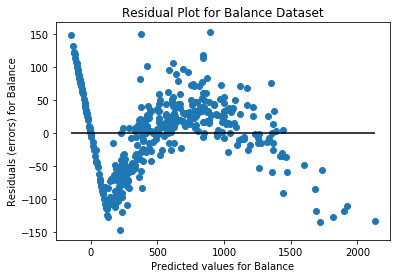

In [95]:
plt.scatter(y_predict, residuals)
plt.hlines(y = 0, xmin = y_predict.min(), xmax = y_predict.max())
plt.title('Residual Plot for Balance Dataset')
plt.xlabel('Predicted values for Balance')
plt.ylabel('Residuals (errors) for Balance')
plt.show()